<h1 style="font-family:verdana; color:red"> <center>Iris Flower 🌺 Classification Using Machine  Learning And Deep Convolutional Neural Networks</center></h1>

<p><center style="color:#159364; font-family:cursive; font-size:20px;">Thanks for visiting my notebook </center></p>



<center><img src='https://media.giphy.com/media/3o7aCUQ7TsQ3cndExq/giphy.gif'></center>


# 🔬Overview 
<div style="background-color:#fff1cc; padding: 20px;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Classifiaction of iris flower with the help of machine learning and the deep learning .Different machine learning alogrithms applied on the datasets and with help of this predict output.There are three species of the iris flower to classify. 
Machine learning consists of various mathamatical models and this models are trained on the data .With 
the help model output is predicted</p>

# 📗 importing the libraries

<p style="font-size:20px  font-family:verdana ">This code import the various data science  machine learning and deep learning  libraries .It also include the system libraries for handling path and matrices </p>




In [93]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


#  📄Placing data into the datasets


In [94]:
data=pd.read_csv("/kaggle/input/iris/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# 📄 Data Processing

In [95]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [97]:
data.shape

(150, 6)

In [98]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#  🔍EDA with seaborn and matplotlob

In [99]:
data.isnull().sum()
print(data["Species"].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


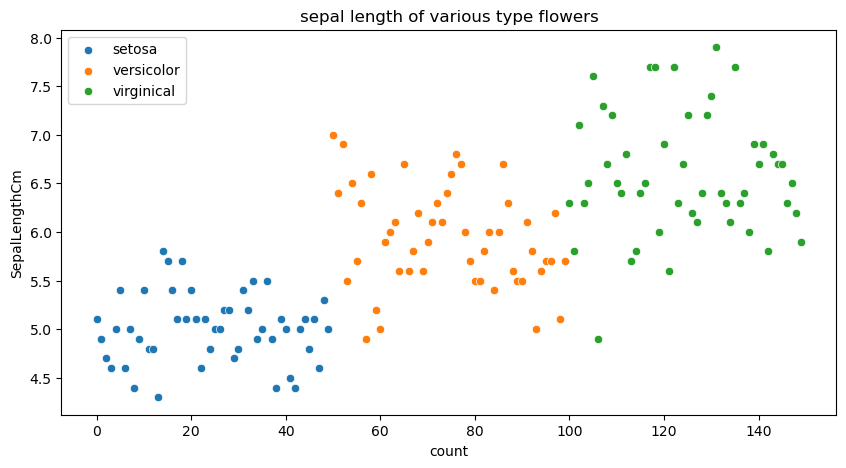

In [100]:
plt.figure(figsize=(10,5))
df_setosa=data[data["Species"]=="Iris-setosa"]
df_versicolor=data[data["Species"]=="Iris-versicolor"]
df_virginica=data[data["Species"]=="Iris-virginica"]


plt.title("sepal length of various type flowers")
sns.scatterplot(df_setosa["SepalLengthCm"],label="setosa")
sns.scatterplot(df_versicolor["SepalLengthCm"],label="versicolor")
sns.scatterplot(df_virginica["SepalLengthCm"],label="virginical")
plt.xlabel("count")
plt.show()
#this scatterplot clearly identify the flower type according to the sepal length
#seaborn scatterplot is used for chart

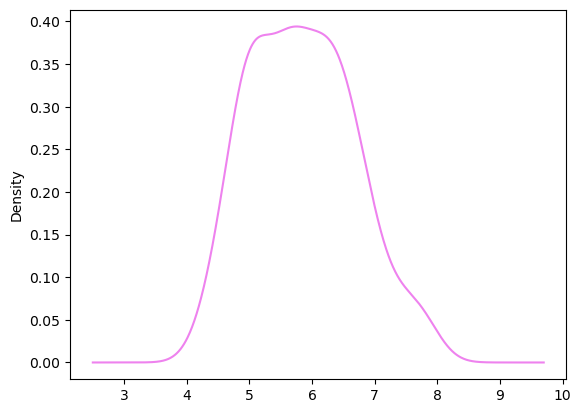

In [101]:
data['SepalLengthCm'].plot(kind= "kde",color = "violet");

<AxesSubplot:ylabel='Frequency'>

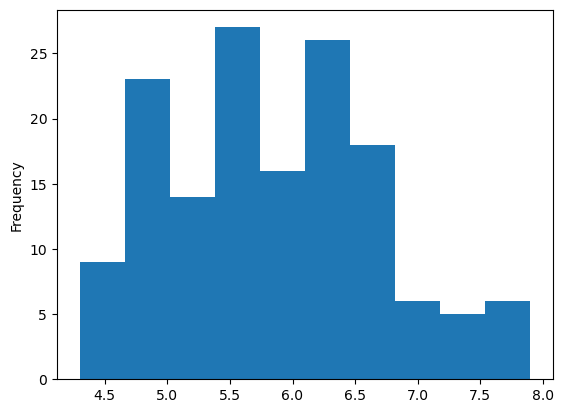

In [102]:
data["SepalLengthCm"].plot(kind="hist")

<AxesSubplot:>

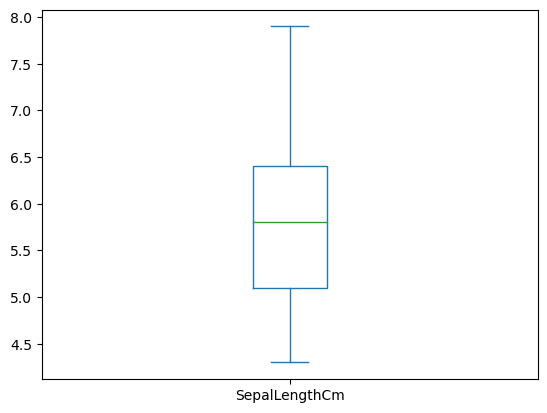

In [103]:
data["SepalLengthCm"].plot(kind="box")

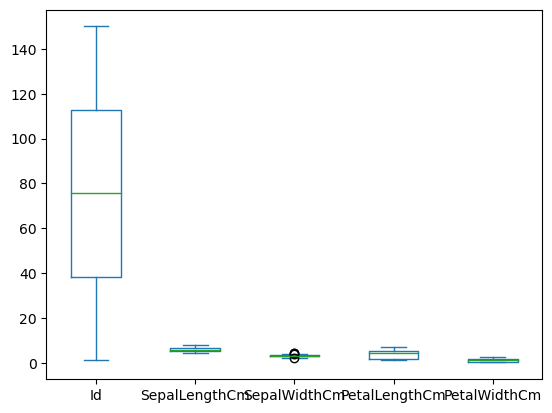

In [104]:
ss=data.drop("Species",axis=1)
ss.plot(kind="box");

In [105]:
df_setosa.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


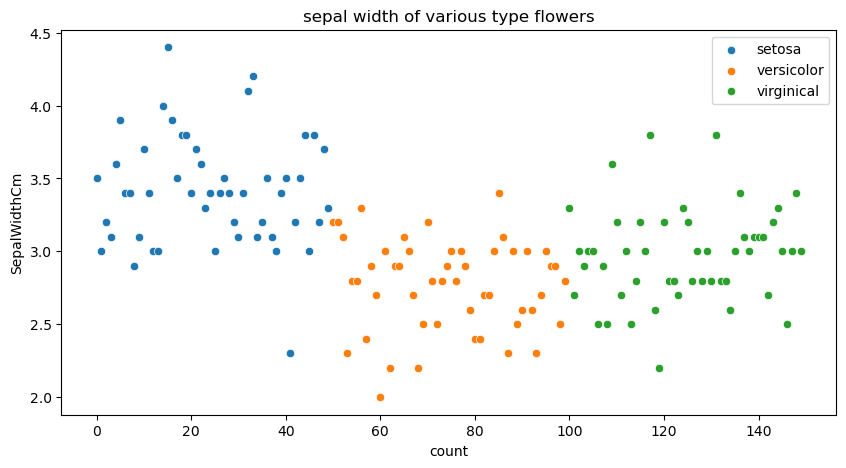

In [106]:
plt.figure(figsize=(10,5))


plt.title("sepal width of various type flowers")
sns.scatterplot(df_setosa["SepalWidthCm"],label="setosa")
sns.scatterplot(df_versicolor["SepalWidthCm"],label="versicolor")
sns.scatterplot(df_virginica["SepalWidthCm"],label="virginical")
plt.xlabel("count")
plt.show()

In [107]:
figure=px.scatter(data,x="SepalLengthCm",y="SepalWidthCm",color="Species",size="PetalLengthCm",title="species classification ")
figure.show()

In [108]:
figure=px.scatter(data,x="PetalLengthCm",y="PetalWidthCm",color="Species",size="SepalLengthCm",title="species classification ")
figure.show()

In [109]:
data["e"]=data["SepalWidthCm"]/100
fig = px.scatter(data, x="SepalWidthCm", y="SepalLengthCm", color="Species",
                 error_x="e", error_y="e")
fig.show()
data=data.drop("e",axis=1)

In [110]:
figure=px.scatter(data,x="PetalLengthCm",y="PetalWidthCm",color="Species",marginal_x="histogram")
figure.show()

In [111]:
figure=px.density_heatmap(data,x="PetalLengthCm",y="PetalWidthCm",marginal_x="histogram",marginal_y="histogram")
figure.show()

In [112]:
fig = px.scatter_ternary(data, a="SepalLengthCm", b="SepalWidthCm", c="PetalLengthCm", 
    color="Species", size="SepalLengthCm", size_max=15,
    color_discrete_map = {"SepalLengthCm": "blue", "Bergeron": "SepalWidthCm", "Coderre":"PetalLengthCm"} )
fig.show()

In [113]:
import plotly.express as px
from sklearn.decomposition import PCA

df = data
features = ["SepalWidthCm", "SepalLengthCm", "PetalWidthCm", "PetalLengthCm"]

pca = PCA()
components = pca.fit_transform(df[features])
#labels = {
   # str(i): f"PC {i+1} ({var:.1f}%)"
    #for i, var in enumerate(pca.explained_variance_ratio_ * 100)
#}

fig = px.scatter_matrix(
    components,
    #labels=labels,
    dimensions=range(4),
    color=df["Species"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [114]:
# coverting the text data into the numerical with the pandas factorize
data=data.drop("Id",axis=1)
data["Species"]=pd.factorize(data["Species"])[0]
print(data["Species"].unique())

[0 1 2]


In [115]:
x=data.drop("Species",axis=1)
y=data[["Species"]]
y.head()
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Training the model 👷


# divide the dataset into the test and train

In [116]:
#importing train_tesst_split by the the use of  sklearn library
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


# Linear Regression

In [117]:
#importing the linear regresiion from sklearn 
#fit is used to tarin data
#score is used to check the accuracy

from sklearn.linear_model import LinearRegression
le=LinearRegression()
le.fit(x_train,y_train)
le.score(x_test,y_test)
le.predict(data.iloc[:1,:4])


array([[-0.07288346]])

In [118]:
#importing the polynomial feature using sklearn
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
#train  data according to the  polynimial feature 
poly_reg.fit(x_train)
#transform the data
train_poly=poly_reg.transform(x_train)
test_poly=poly_reg.transform(x_test)


In [119]:
le.fit(train_poly,y_train)
le.score(test_poly,y_test)


0.9373030321348331

In [120]:
x1=data.drop("Species",axis=1)
y1=data[["Species"]]
y1.head()
x1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [121]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.2)

In [122]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x1_train)
x1_train=sc.transform(x1_train)
x1_test=sc.transform(x1_test)

In [123]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
svr_rbf=SVC(kernel='rbf')
svr_rbf.fit(x1_train,y1_train)
svr_rbf.score(x1_test,y1_test)

0.9666666666666667

# Support Vector Machine

In [124]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
svr_rbf=SVC(kernel='linear')
svr_rbf.fit(x1_train,y1_train)
print(svr_rbf.score(x1_test,y1_test))
svr_rbf.predict([x1_test[0]])


0.9666666666666667


array([1])

In [125]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
svr_rbf=SVC(kernel='poly',degree=2)
svr_rbf.fit(x1_train,y1_train)
svr_rbf.score(x1_test,y1_test)

0.8

# Decision Tree

In [126]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="gini")
classifier.fit(x1_train,y1_train)
classifier.score(x1_test,y1_test)

0.9

In [127]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy",random_state=100,min_samples_split=30,min_samples_leaf=5,max_features=4)
classifier.fit(x1_train,y1_train)
classifier.score(x1_test,y1_test)

0.9

# Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.9333333333333333

# KNeighborsClassifier

In [129]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
kn.score(x_test,y_test)

0.9333333333333333

In [130]:
output=(kn.predict(x_test))
output

array([1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 0, 2, 0, 0, 1, 0])

In [136]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_test,output)
acc

0.9333333333333333

In [138]:
from sklearn.metrics import confusion_matrix

mat=confusion_matrix(y_test,output)

mat

array([[ 9,  0,  0],
       [ 0, 10,  1],
       [ 0,  1,  9]])

In [146]:
from sklearn.metrics import classification_report

report=classification_report(y_test,output)


print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.91      0.91      0.91        11
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



# Deep Convolutional Neural Networks

In [149]:
#from autoviz.classify_method import data_cleaning_suggestions
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout


In [150]:
model = Sequential([
    Dense(32, activation = 'relu', input_shape = (x_train.shape[1],)),
    Dropout(0.1),
    Dense(32, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

In [151]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,249
Trainable params: 1,249
Non-trainable params: 0
_________________________________________________________________


In [154]:
model.fit(x_train, y_train, epochs = 20, batch_size = 16, validation_data = (x_test, y_test))

Epoch 1/20
8/8 [==============================] - 2s 43ms/step - loss: 2.8333 - accuracy: 0.3750 - val_loss: 1.5949 - val_accuracy: 0.3000
Epoch 2/20
8/8 [==============================] - 0s 7ms/step - loss: 1.7912 - accuracy: 0.3167 - val_loss: 0.4146 - val_accuracy: 0.6667
Epoch 3/20
8/8 [==============================] - 0s 7ms/step - loss: 0.7100 - accuracy: 0.3250 - val_loss: -0.1779 - val_accuracy: 0.3667
Epoch 4/20
8/8 [==============================] - 0s 7ms/step - loss: -0.0546 - accuracy: 0.3417 - val_loss: -0.4914 - val_accuracy: 0.3667
Epoch 5/20
8/8 [==============================] - 0s 7ms/step - loss: -0.2913 - accuracy: 0.3750 - val_loss: -0.7220 - val_accuracy: 0.3667
Epoch 6/20
8/8 [==============================] - 0s 7ms/step - loss: -0.1568 - accuracy: 0.3917 - val_loss: -0.9247 - val_accuracy: 0.3667
Epoch 7/20
8/8 [==============================] - 0s 7ms/step - loss: -0.8040 - accuracy: 0.3250 - val_loss: -1.1111 - val_accuracy: 0.3667
Epoch 8/20
8/8 [========

In [155]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

1/1 [==============================] - 0s 31ms/step - loss: -5.3316 - accuracy: 0.3667
Test loss: -5.3316
Test accuracy: 0.3667


# Thank You 
<div style="background-color:#fff1cc; padding: 20px;">
<p style="font-size:20px; font-family:verdana; line-height: 1.7em">Accuracy of the model is 93%. SVC and Random Forest have the higher accuracy .</p>

<center><img src='https://media.giphy.com/media/HlfQT0QsIYIBdyL6qZ/giphy.gif'></center>


# 